# **HR Performance Metrics Analysis**

In [163]:
# library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [164]:
# Data loading

df = pd.read_csv('/content/HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [165]:
# initual exploration
df.shape

(311, 36)

In [166]:
# check column names, and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [167]:
#  statistics of the data set
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [168]:
df.describe(include='object')

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Adinolfi, Wilson K",Production Technician I,MA,09/09/65,F,Single,US Citizen,No,White,1/10/2011,8/19/2018,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


In [169]:
# check for missing values, shows only colums with missing values
df.isnull().sum()[df.isnull().sum() > 0]

,0
DateofTermination,207
ManagerID,8


The **207 missing values** in the **DateofTermination** column indicate that these employees are **still currently employed** by the company.

In [170]:
# explore the missing values in ManagerID
df.loc[df['ManagerID'].isnull(),'ManagerName']

,ManagerName
19,Webster Butler
30,Webster Butler
44,Webster Butler
88,Webster Butler
135,Webster Butler
177,Webster Butler
232,Webster Butler
251,Webster Butler


**All missing values** in the **ManagerID** column correspond to employees managed by **Webster Butler**.

In [171]:
# let's try to find the ID of manager Webster Butler
df[df['ManagerName'] == 'Webster Butler'][['ManagerName', 'ManagerID']]

,ManagerName,ManagerID
4,Webster Butler,39.0
19,Webster Butler,NaN
30,Webster Butler,NaN
44,Webster Butler,NaN
65,Webster Butler,39.0
88,Webster Butler,NaN
89,Webster Butler,39.0
105,Webster Butler,39.0
124,Webster Butler,39.0
135,Webster Butler,NaN


Good news! Based on the result above the **missing ManagerID is 39**.

In [172]:
# check the data type of ManagerID column
type(df['ManagerID'][0])

numpy.float64

In [173]:
# Handle missing values
df.loc[(df['ManagerName'] == 'Webster Butler') & (df['ManagerID'].isnull()), 'ManagerID'] = 39.0

In [174]:
#  double check for missing values in ManagerID column
df['ManagerID'].isnull().sum()

0

In [175]:
# convert the data type of ManagerID column from float to int
df['ManagerID'] = df['ManagerID'].astype(int)

In [176]:
# double check data type of ManagerID column
type(df['ManagerID'][0])

numpy.int64

In [177]:
# lets see the date containing columns
df[['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']]

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,07/10/83,7/5/2011,NaN,1/17/2019
1,05/05/75,3/30/2015,6/16/2016,2/24/2016
2,09/19/88,7/5/2011,9/24/2012,5/15/2012
3,09/27/88,1/7/2008,NaN,1/3/2019
4,09/08/89,7/11/2011,9/6/2016,2/1/2016
...,...,...,...,...
306,05/11/85,7/7/2014,NaN,2/28/2019
307,05/04/82,9/2/2008,9/29/2015,9/2/2015
308,08/30/79,4/10/2010,NaN,2/21/2019
309,02/24/79,3/30/2015,NaN,2/1/2019


Based on the subset above, the columns '**DateofHire', 'DateofTermination', and 'LastPerformanceReview_Date'** all follow the **date format 'M/DD/YYYY**'. In contrast, the **'DOB' column** uses a different format, **'MM/DD/YY'**. Consequently, the preprocessing of these columns will need to be handled separately to account for their differing date structures.

In [178]:
# create a date parser
def date_parser(date_str):
    try:
        date = datetime.strptime(date_str, '%m/%d/%y')

        if date.year > datetime.now().year:
            return date.replace(year=date.year - 100)
        return date
    except ValueError:
        return pd.NaT

In [179]:
# Handle 'DOB' column (format: MM/DD/YY), data type conversion str -> datetime
df['DOB'] = pd.to_datetime(df['DOB'].astype(str).apply(date_parser), errors='coerce')


In [180]:
# check the result from the data conversion
df.DOB.head(10)

,DOB
0,1983-07-10
1,1975-05-05
2,1988-09-19
3,1988-09-27
4,1989-09-08
5,1977-05-22
6,1979-05-24
7,1983-02-18
8,1970-02-11
9,1988-01-07


In [181]:
# convert all other date columns from data type str to datetime
date_columns = ['DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')


In [182]:
# check results from data conversion
df[date_columns].head(10)

,DateofHire,DateofTermination,LastPerformanceReview_Date
0,2011-07-05,NaT,2019-01-17
1,2015-03-30,2016-06-16,2016-02-24
2,2011-07-05,2012-09-24,2012-05-15
3,2008-01-07,NaT,2019-01-03
4,2011-07-11,2016-09-06,2016-02-01
5,2012-01-09,NaT,2019-01-07
6,2014-11-10,NaT,2019-01-02
7,2013-09-30,NaT,2019-02-25
8,2009-07-06,NaT,2019-01-25
9,2015-01-05,NaT,2019-02-18


In [183]:
# check the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

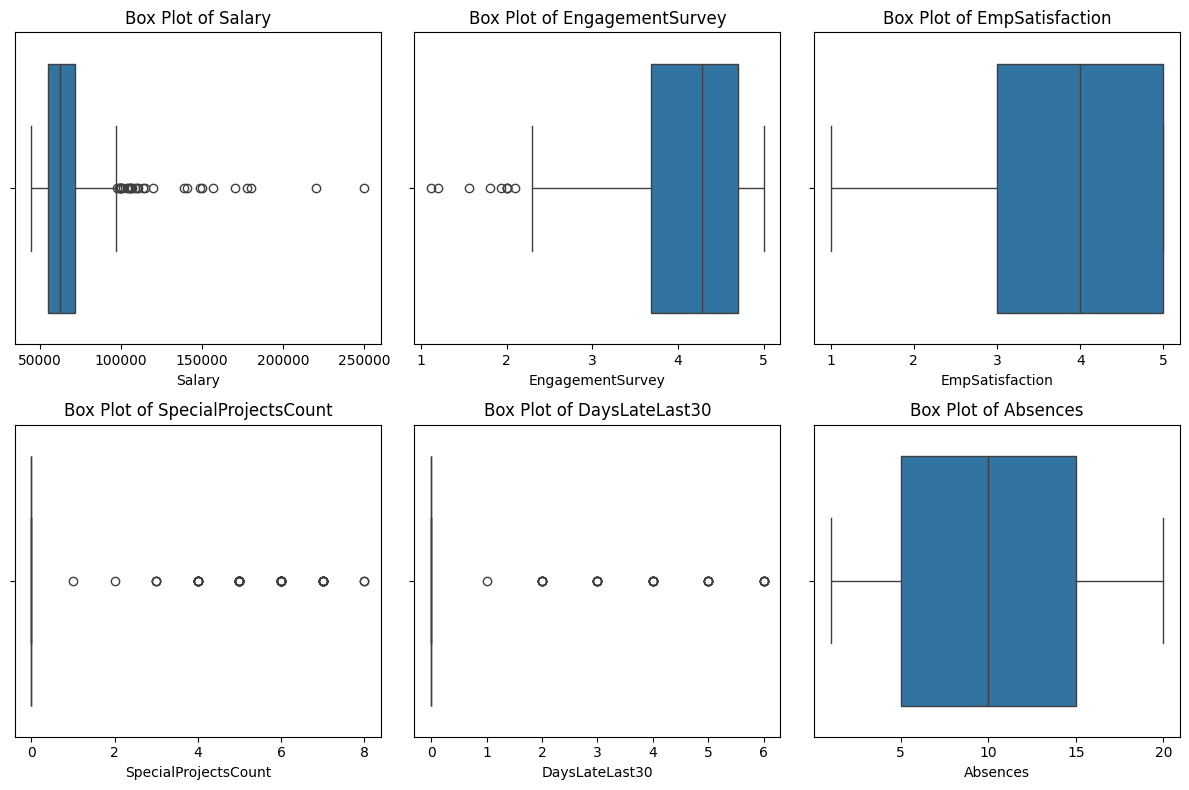

In [184]:
# Check numerical columns for outliers
numerical_columns = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']

plt.figure(figsize=(12, 8))

# Create box plots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

**Feature Engineering**

In [185]:
current_date = datetime.now()

In [186]:
print("Current date used for calculation:", current_date)

Current date used for calculation: 2024-08-26 20:59:53.174617


In [187]:
# create new columns
df['Age'] = ((current_date - df['DOB']).dt.days / 365.25).apply(np.floor).astype(int)
df['AgeAtHiring'] = ((df['DateofHire'] - df['DOB']).dt.days / 365.25).apply(np.floor).astype(int)
df['Tenure'] = ((df['DateofTermination'].fillna(current_date) - df['DateofHire']).dt.days / 365.25).round().astype(int)
df['YearsSinceLastReview'] = ((current_date - df['LastPerformanceReview_Date']).dt.days / 365.25).round().astype(int)

In [188]:
# view new columns
df[['Age','AgeAtHiring','Tenure','YearsSinceLastReview']].head(10)

,Age,AgeAtHiring,Tenure,YearsSinceLastReview
0,41,27,13,6
1,49,39,1,9
2,35,22,1,12
3,35,19,17,6
4,34,21,5,9
5,47,34,13,6
6,45,35,10,6
7,41,30,11,6
8,54,39,15,6
9,36,26,10,6


**Exploratory Data Analysis (EDA)**


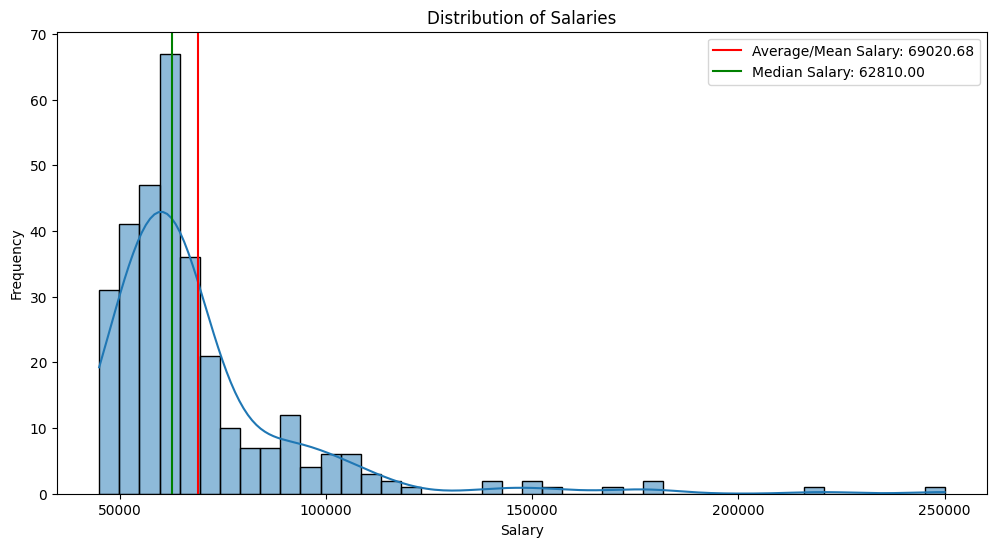

In [189]:
# Distribution of Salaries
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary'], kde=True)
plt.axvline(df['Salary'].mean(), color='r', label=f'Average/Mean Salary: {df["Salary"].mean():.2f}')
plt.axvline(df['Salary'].median(), color='g', label = f'Median Salary: {df["Salary"].median():.2f}')
plt.legend()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

The salary distribution in the dataset shows considerable variation, with a **right-skewed distribution**.
This skew implies that **a portion of employees earn significantly higher salaries**, pulling the mean (69,020.68) upwards compared to the median(62,810.00). Specifically, the presence of a maximum salary as high as $250,000.00 indicates outliers or high earners in the dataset.
This distribution should be considered when evaluating salary equity and making compensation decisions.

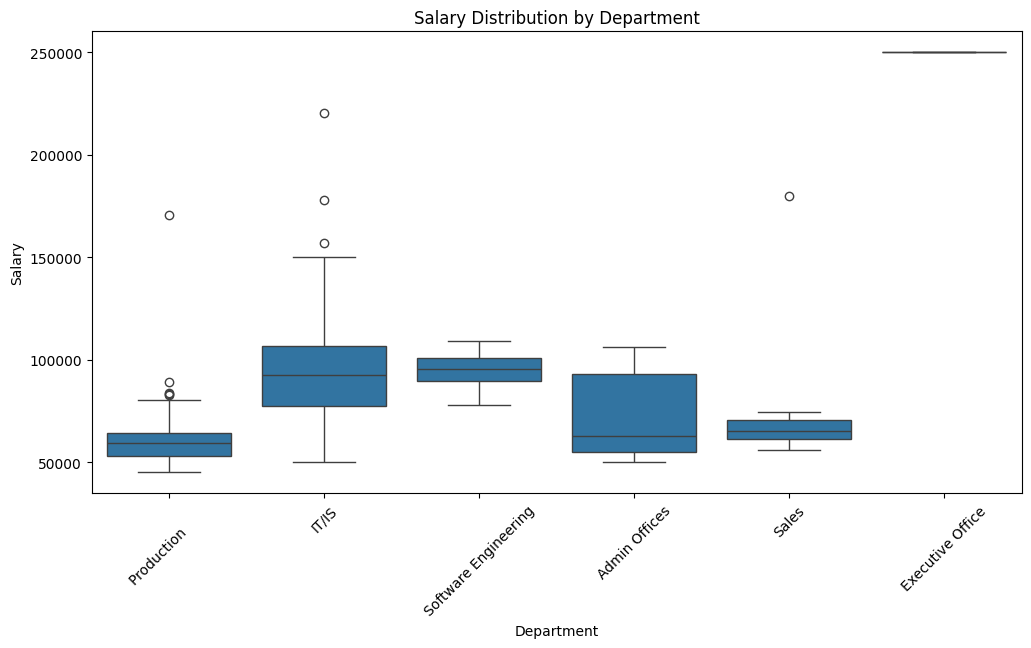

In [190]:
# Salary Distribution by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xticks(rotation=45)
plt.show()

**Insights:**

**Production** salaries are relatively close to the **median (59,472.00)** with a broad range at the upper end. The **average (59,953.55)** is slightly higher than the median, suggesting that higher salaries are pulling up the average. The **maximum salary (170,500)** is considerably higher than the 75th percentile (64,066.00), indicating possible outliers or specialized roles with high compensation.

The **IT/IS department** exhibits a high **average salary (97,064.64)** with significant variability. The **maximum salary (220,450.00)** is notably higher than the 75th percentile (106,844.50), suggesting the presence of high earners or potential outliers . The wide range between the 25th (77,417.75) and 75th percentiles indicates a diverse salary structure.

**Software Engineering** shows high **average (94,989.45)** and **median (95,660.00)** salaries with a relatively narrow range between the 25th (89,601.50) and 75th (100,807.50) percentiles, suggesting consistent compensation levels. The **maximum salary (108,987.00)** is higher than the 75th percentile, indicating the presence of high earners.

The **Admin Offices** show a considerable salary range with a **maximum salary ($106,367.00)** that is significantly higher than the **median (63,003.00)**. The **average salary (71,791.89)** is higher than the median, suggesting a few high earners could be skewing the average. The gap between the 25th (55,000.00) and 75th (93,046.00) percentiles indicates variability within this department.

**Sales department** salaries are fairly balanced with the **average (69,061.26)** close to the **median (65,310.00)**. The **maximum salary (180,000.00)** is significantly higher than the 75th percentile (70,506.50), suggesting a few high earners. The relatively narrow range between the 25th (61,561.50) and 75th percentiles indicates moderate variability.

The **Executive Office** currently has a **single employee** in the dataset, therefore the salary data reflects only one individual’s compensation **(250000.00)**. As a result, there is no variation or outliers in the pay structure for this department.

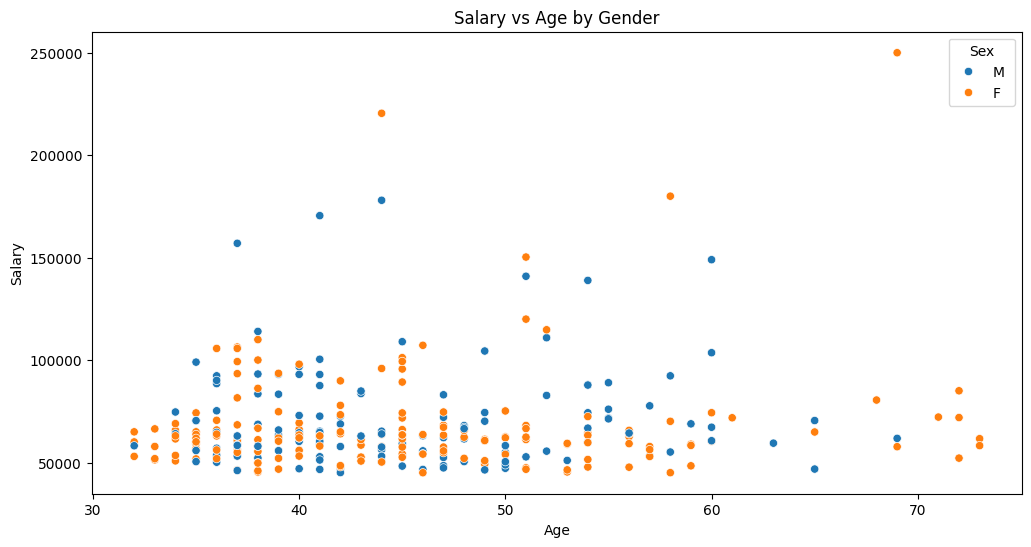

In [191]:
# Salary vs Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Salary', hue='Sex', data=df)
plt.title('Salary vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

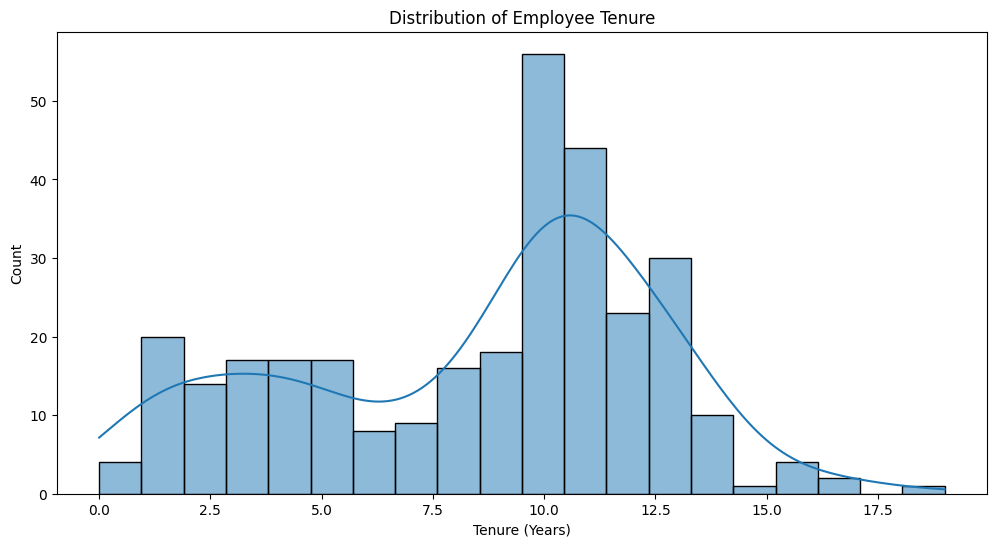

In [192]:
# Distribution of Employee Tenure
plt.figure(figsize=(12, 6))
sns.histplot(df['Tenure'], kde=True, bins=20)
plt.title('Distribution of Employee Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()

The tenure range from **9.50 to 10.45** years has the **highest number of employees**, with 56 employees, indicating that this is a common tenure range among employees.There may be a need to focus on retention strategies and career development for employees around this tenure, as they represent a significant portion of the workforce.

Ranges with **very low employee** counts include **14.25 to 15.20** years (1 employee), and **17.10 to 18.05** years and **18.05 to 19.00** years (0 and 1 employee respectively). These ranges have fewer employees, indicating they are less common. The low count of employees in the higher tenure ranges indicates potential opportunities for developing strategies to retain long-term employees and provide career growth opportunities to extend tenure.

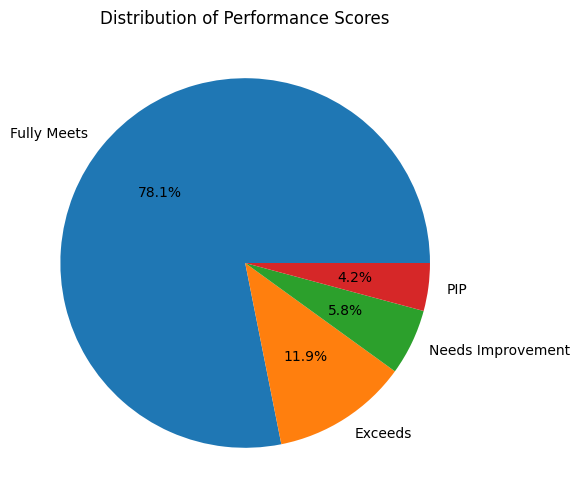

In [193]:
# Distribution of Performance Scores
plt.figure(figsize=(6, 6))
df['PerformanceScore'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Performance Scores')
plt.ylabel('')
plt.show()

The performance score distribution within the organization reveals that **78.1%** of employees are classified as **Fully Meets**, indicating that a significant majority are meeting their performance expectations. **11.9%** of employees are in the **Exceeds** category, representing high achievers who perform above expectations. Meanwhile, **5.8%** of employees fall under **Needs Improvement**, suggesting areas where additional support may be required. Lastly, **4.2%** of employees are currently under a **Performance Improvement Plan (PIP)**, reflecting a small group facing more serious performance challenges.

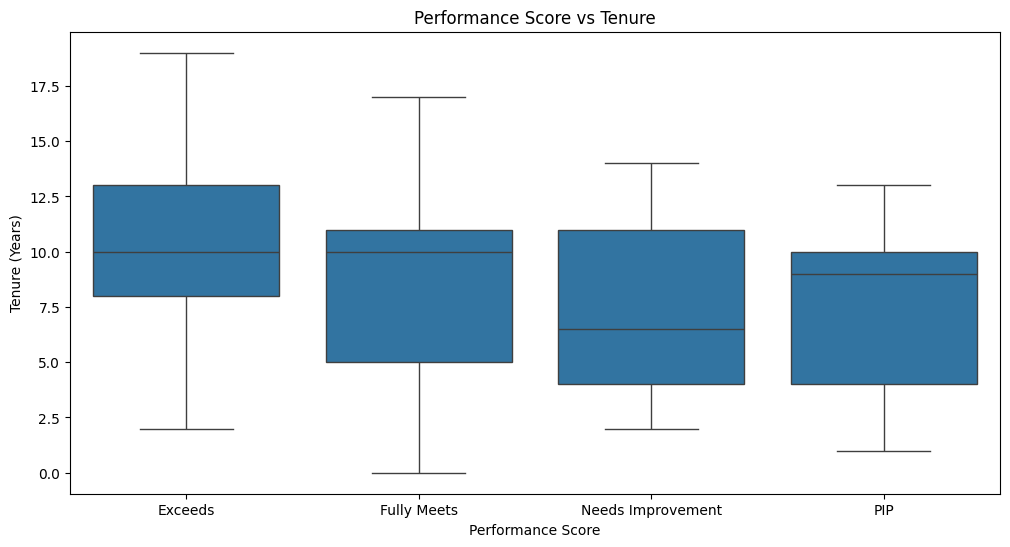

In [194]:
# Performance Score vs Tenure
plt.figure(figsize=(12, 6))
sns.boxplot(x='PerformanceScore', y='Tenure', data=df)
plt.title('Performance Score vs Tenure')
plt.xlabel('Performance Score')
plt.ylabel('Tenure (Years)')
plt.show()

Employees with a performance score of "**Exceeds**" have the longest average tenure at 9.86 years, with a median tenure of 10 years. They also exhibit a high range in tenure, from 2 to 19 years, reflecting a broad distribution among top performers.

In the "**Fully Meets**" category, employees have an average tenure of 8.37 years and a median tenure of 10 years. This group shows a tenure range from 0 to 17 years, indicating a mix of newer and more established employees who meet performance expectations.

Those categorized as "**Needs Improvement**" have a lower average tenure of 7.39 years and a median tenure of 6.5 years. Their tenure ranges from 2 to 14 years, suggesting shorter tenure compared to higher performance categories.

Employees on a "**PIP**" have an average tenure of 7.92 years and a median tenure of 9 years. The tenure for this group ranges from 1 to 13 years, reflecting relatively shorter tenures and indicating potential issues with long-term retention among those in performance improvement plans.

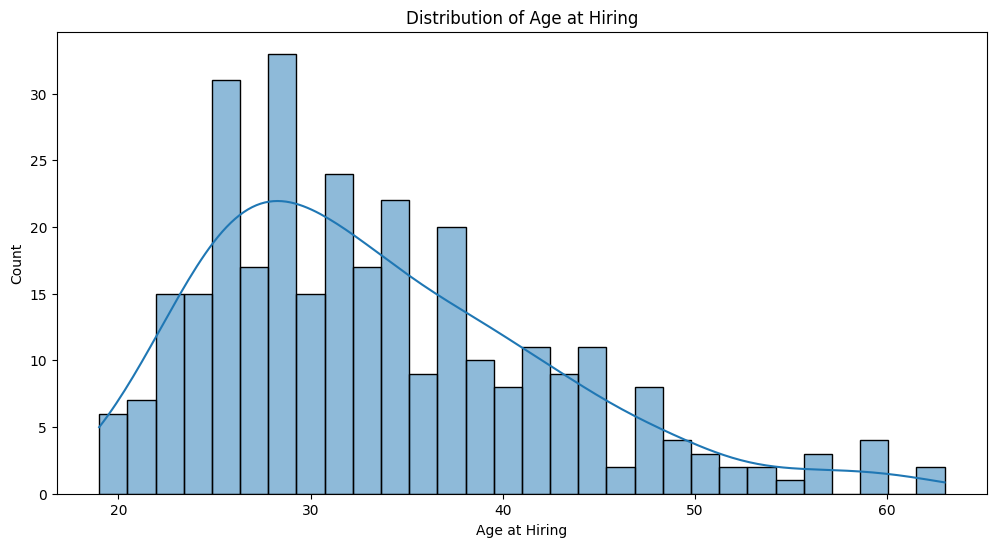

In [195]:
# Age at Hiring Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['AgeAtHiring'], kde=True, bins=30)
plt.title('Distribution of Age at Hiring')
plt.xlabel('Age at Hiring')
plt.ylabel('Count')
plt.show()

The age distribution at hiring shows a broad range with some notable patterns. The **majority** of hires fall between **24 and 29 years old**. A significant number of hires occur in the age range of 27 to 29 years, with 33 hires recorded.

The age at hiring ranges from a minimum of 19 years to a maximum of 63 years. Notably, the median age is 32 years, and 75% of hires are 39 years old or younger, indicating that most employees are hired within a relatively young age range.

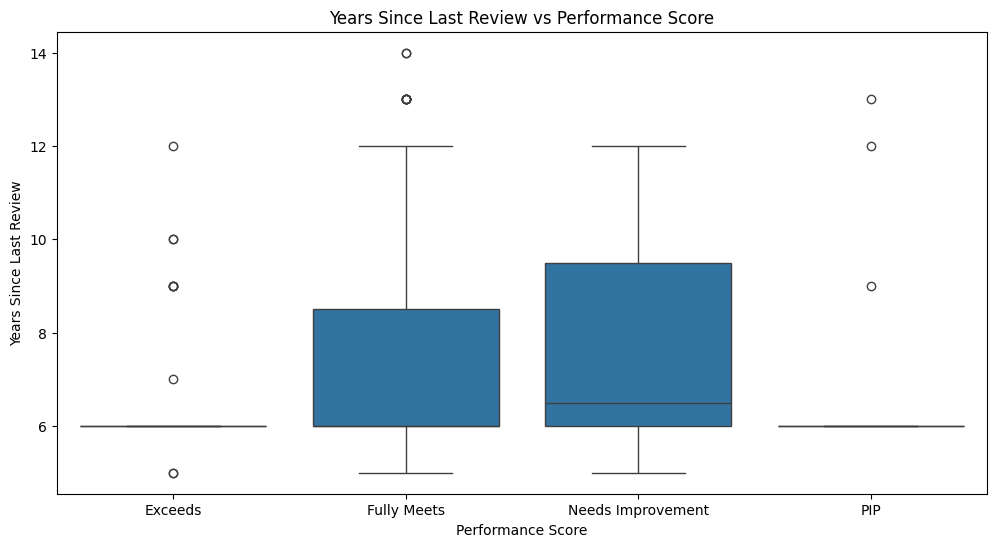

In [196]:
# Years Since Last Review vs Performance Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='PerformanceScore', y='YearsSinceLastReview', data=df)
plt.title('Years Since Last Review vs Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Years Since Last Review')
plt.show()

Employees categorized as "**Exceeds**" have an average of 6.68 years since their last review, with a **median of 6 years** and a range from 5 to 12 years. Those rated as "**Fully Meets**" show a higher average of 7.26 years, with a **median of 6 years** and a range from 5 to 14 years.

Employees in the "**Needs Improvement**" category have an average of 7.67 years since their last review, slightly higher than those in the "Fully Meets" category, with a **median of 6.5 years** and a range from 5 to 12 years. Lastly, those under a "**PIP**" have an average of 7.23 years since their last review, with a **median of 6 years** and a range from 6 to 13 years.

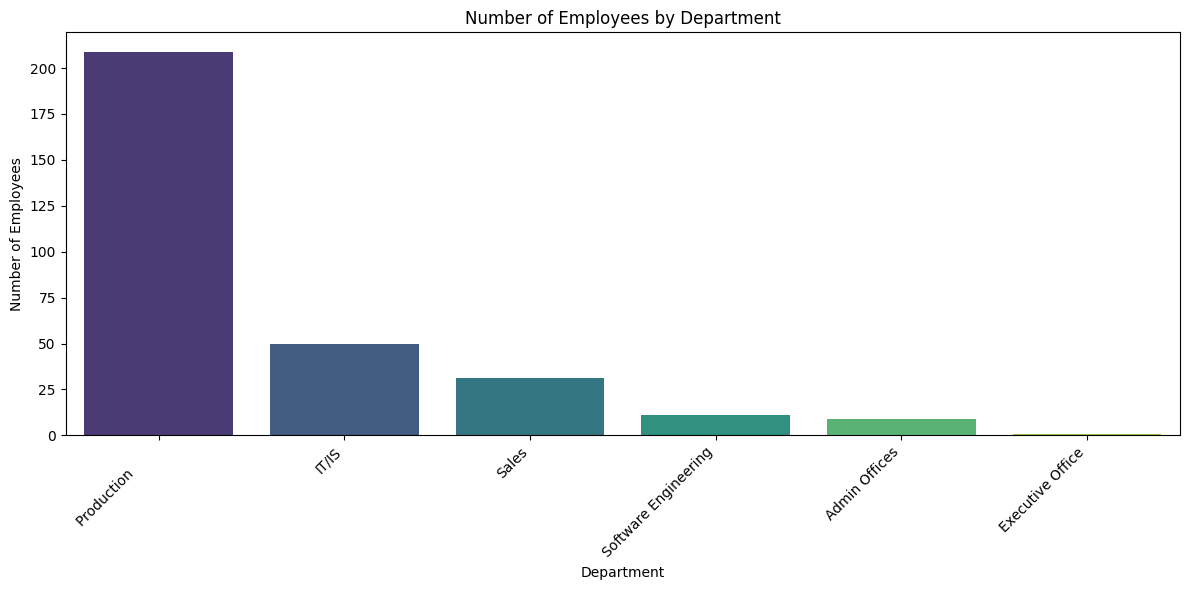

In [197]:
# Number of employees by department
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Department'].value_counts().index,
            y=df['Department'].value_counts().values,
            palette='viridis')
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

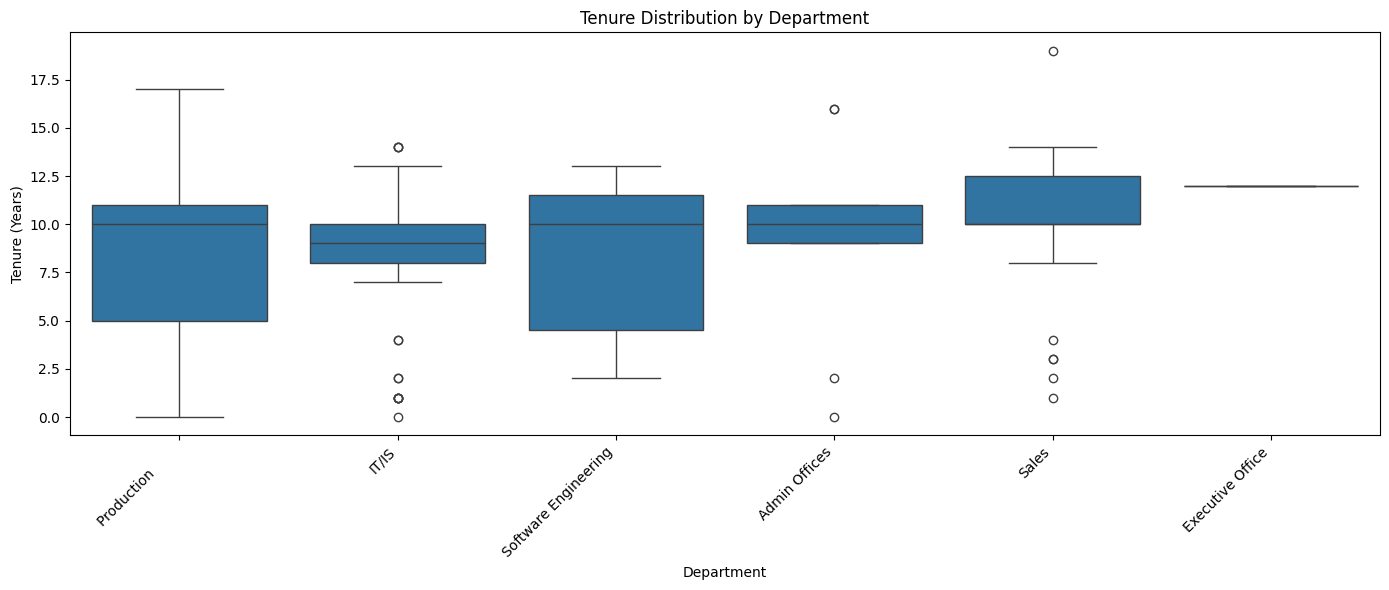

In [198]:
#  Tenure vs Department
plt.figure(figsize=(14, 6))
sns.boxplot(x='Department', y='Tenure', data=df)
plt.title('Tenure Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Production** employees have an average tenure of 8 years and a median of 10 years, with a maximum tenure of 17 years, reflecting a broad range of experience within the large group of 209 employees.

In the **IT/IS department**, employees have an average tenure of 8.24 years, with a median of 9 years and a maximum tenure of 14 years, indicating a stable range of experience among the 50 employees.

**Software Engineering** employees have an average tenure of 8.64 years, with a median of 10 years and a maximum of 13 years, showing a good level of experience within the 11 employees.

The **Admin Offices** department has an average tenure of 9 years, with a median tenure of 10 years and a maximum of 16 years. However, due to a small sample size of 9 employees, there is a relatively high variability in tenure.

The **Sales department** has the highest average tenure at 10.06 years, with a median of 10 years and a maximum of 19 years, suggesting a strong retention rate among 31 employees.

Lastly, **Executive Office** shows a single employee with a tenure of 12 years, resulting in no standard deviation due to the lack of variance.

